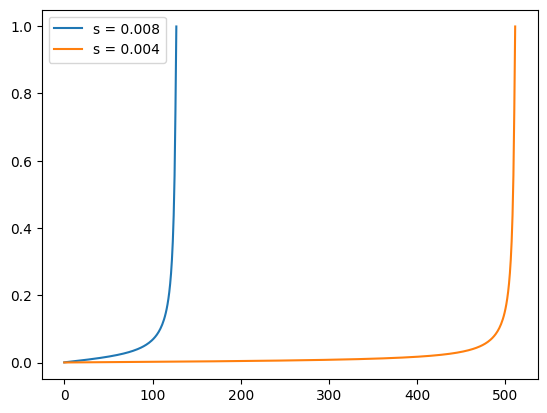

In [8]:
import torch
import numpy as np

def cosine_beta_schedule(timesteps, s=0.008, dtype=torch.float32):
    """
    cosine schedule
    as proposed in https://openreview.net/forum?id=-NEXDKk8gZ
    """
    steps = timesteps + 1
    x = np.linspace(0, steps, steps)
    alphas_cumprod = np.cos(((x / steps) + s) / (1 + s) * np.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    betas_clipped = np.clip(betas, a_min=0, a_max=0.999)
    return torch.tensor(betas_clipped, dtype=dtype)

t1 = cosine_beta_schedule(timesteps = 128, s = 0.008)
t2 = cosine_beta_schedule(timesteps = 256, s = 0.008)
t2 = cosine_beta_schedule(timesteps = 512, s = 0.008)

# plot this on matplotlib
import matplotlib.pyplot as plt
plt.plot(t1, label = 's = 0.008')
plt.plot(t2, label = 's = 0.004')
plt.legend()
plt.show()



{0: 9, 10: 9, 20: 9, 30: 9, 40: 9, 50: 9, 60: 9, 70: 9, 80: 9, 90: 9, 100: 9, 110: 9, 120: 9, 130: 9, 140: 9, 150: 9, 160: 9, 170: 9, 180: 9, 190: 9, 200: 9, 210: 9, 220: 9, 230: 9}
248 249
247 248
246 247
245 246
244 245
243 244
242 243
241 242
240 241
239 240
238 239
237 238
236 237
235 236
234 235
233 234
232 233
231 232
230 231
231 230
232 231
233 232
234 233
235 234
236 235
237 236
238 237
239 238
240 239
239 240
238 239
237 238
236 237
235 236
234 235
233 234
232 233
231 232
230 231
231 230
232 231
233 232
234 233
235 234
236 235
237 236
238 237
239 238
240 239
239 240
238 239
237 238
236 237
235 236
234 235
233 234
232 233
231 232
230 231
231 230
232 231
233 232
234 233
235 234
236 235
237 236
238 237
239 238
240 239
239 240
238 239
237 238
236 237
235 236
234 235
233 234
232 233
231 232
230 231
231 230
232 231
233 232
234 233
235 234
236 235
237 236
238 237
239 238
240 239
239 240
238 239
237 238
236 237
235 236
234 235
233 234
232 233
231 232
230 231
231 230
232 231
233 232
23

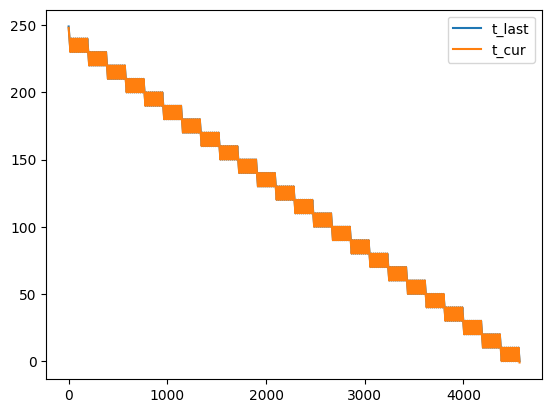

[(249, 248), (248, 247), (247, 246), (246, 245), (245, 244), (244, 243), (243, 242), (242, 241), (241, 240), (240, 239), (239, 238), (238, 237), (237, 236), (236, 235), (235, 234), (234, 233), (233, 232), (232, 231), (231, 230), (230, 231), (231, 232), (232, 233), (233, 234), (234, 235), (235, 236), (236, 237), (237, 238), (238, 239), (239, 240), (240, 239), (239, 238), (238, 237), (237, 236), (236, 235), (235, 234), (234, 233), (233, 232), (232, 231), (231, 230), (230, 231), (231, 232), (232, 233), (233, 234), (234, 235), (235, 236), (236, 237), (237, 238), (238, 239), (239, 240), (240, 239), (239, 238), (238, 237), (237, 236), (236, 235), (235, 234), (234, 233), (233, 232), (232, 231), (231, 230), (230, 231), (231, 232), (232, 233), (233, 234), (234, 235), (235, 236), (236, 237), (237, 238), (238, 239), (239, 240), (240, 239), (239, 238), (238, 237), (237, 236), (236, 235), (235, 234), (234, 233), (233, 232), (232, 231), (231, 230), (230, 231), (231, 232), (232, 233), (233, 234), (23

In [6]:
def get_schedule_jump():
    """ From RePAINT paper """
    t_T = 250
    jump_length = 10
    jump_n_sample = 10

    jumps = {}
    for j in range(0, t_T - jump_length, jump_length):
        jumps[j] = jump_n_sample - 1

    print(jumps)

    t = t_T
    ts = []

    while t >= 1:
        t = t-1
        ts.append(t)

        if jumps.get(t, 0) > 0:
            jumps[t] = jumps[t] - 1
            for _ in range(jump_length):
                t = t + 1
                ts.append(t)

    ts.append(-1)

    return ts

times = get_schedule_jump()
time_pairs = list(zip(times[:-1], times[1:]))
t_lasts = []
t_curs = []
for t_last, t_cur in time_pairs:
    print(t_cur, t_last)
    t_curs.append(t_cur)
    t_lasts.append(t_last)


plt.plot(t_lasts, label = 't_last')
plt.plot(t_curs, label = 't_cur')
plt.legend()
plt.show()

print(time_pairs)
print(len(time_pairs))